# Legendre curve plotting demo
In this notebook we show the spectral nature of Legendre curves. The parameters we learn are a kind of a frequency
domain, defining the spectrum of the curves. They oscilate more close to the origin, and less farther away from
the origin.

In [11]:
import torch
import torch.nn.functional as F
import torchcurves.functional as tcf
import matplotlib.pyplot as plt

## Define parameters

In [ ]:
degree = 10
n_coefficients = 1 + degree

## Define coefficients of various curves

In [66]:
num_curves = 3
dim = 2

t = torch.linspace(-1, 1, n_coefficients)

freq = torch.pi * n_coefficients
first_coef = torch.stack([torch.sin(freq * t), torch.cos(freq * t)], dim=1)
second_coef = torch.stack([torch.sin(freq * t) / F.softplus(t), torch.cos(freq * t) / F.softplus(t)], dim=1)
third_coef = torch.stack([torch.exp(t) / (1 + 5 * (1 + t)), torch.sin(freq * t) / (1 + 10 * (1 + t))], dim=1)
coefs = torch.stack([first_coef, second_coef, third_coef], dim=1)
coefs.shape

torch.Size([6, 3, 2])

## Sample and draw the Legendre curves with 100 sample points from -1 to 1

In [67]:
sample_points = torch.torch.linspace(-1, 1, 1000)
curve_args = sample_points.reshape(-1, 1).expand(-1, 3)

In [68]:
curve_points = tcf.legendre_curves(curve_args, coefs)
curve_points.shape

torch.Size([1000, 3, 2])

In [69]:
first_curve, second_curve, third_curve = curve_points.unbind(dim=1)

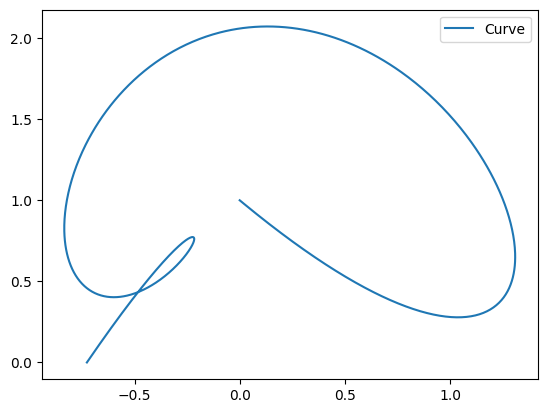

In [70]:
plt.plot(*first_curve.unbind(dim=1), label='Curve')
plt.legend()
plt.show()

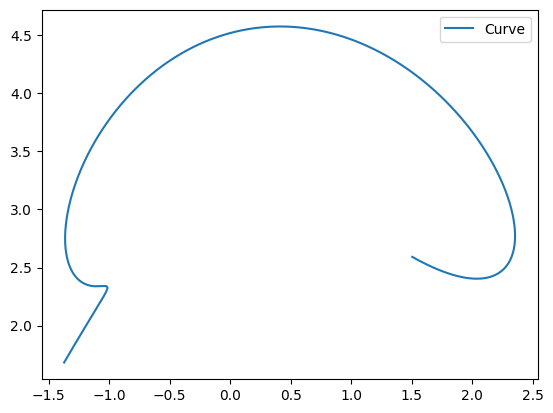

In [71]:
plt.plot(*second_curve.unbind(dim=1), label='Curve')
plt.legend()
plt.show()

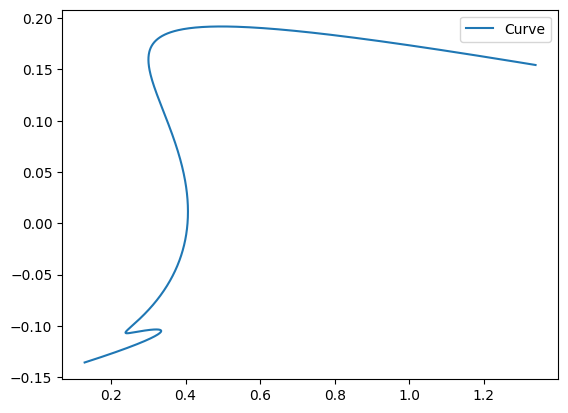

In [72]:
plt.plot(*third_curve.unbind(dim=1), label='Curve')
plt.legend()
plt.show()